In [1]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [7]:
#get list of client rules sorted by count
popSize = 100
clientFilename = "../Data/ICU/Best/"
# dataFilename = "../Data/Sepsis/Best/"

ldpFilename = "../Results/ICU_Ruleset_MCTS_Test.csv"
graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [3]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

File not found for Client 8
File not found for Client 81


,Rule,Rule Count,Percent of Population
53,"((MET > 0.000) U[0,0] (death = 0.000))",231,1.00
57,"G[0,0]((n_evts < 0.000 -> LOS > 0.000))",203,1.00
56,"F[0,0]((BLOOD_UREA_NITROGEN < 0.000 & CREATINI...",74,0.74
229,"F[0,0](((af < 0.000 | AF < 0.000) & cosen > 0....",42,0.42
47,"G[0,0]((hr > 0.000 & Pulse > 0.000))",39,0.39
...,...,...,...
1831,"G[0,0]((edrk > 0.000 -> ICU_Pt_Days < 0.000))",1,0.01
1832,"F[0,0]((af < 0.000 & Mort < 0.000))",1,0.01
1834,"G[0,0]((s24_edrk < 0.000 & s8_edrk > 0.000))",1,0.01
1835,"G[0,0]((death < 0.000 & s2_edrk > 0.000))",1,0.01


## Load LDP Ruleset

In [8]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
4,"G[0,0]((n_evts < 0.000 | lds > 0.000))",0.489
6,"G[0,0]((n_evts < 0.000 | hr = 0.000))",0.489
0,"F[0,0]((death > 0.000 & n_evts = 0.000))",0.375
7,"F[0,0]((death > 0.000 & Sgy > 0.000))",0.364
1,"G[0,0]((direct < 0.000 & SBP = 0.000))",0.298
5,"G[0,0]((direct < 0.000 & SBP < 0.000))",0.298
2,"G[0,0]((edrk = 0.000 & SBP = 0.000))",0.234
3,"G[0,0]((s8_hr > 0.000 & SBP = 0.000))",0.234
8,"G[0,0]((edrk = 0.000 & SBP < 0.000))",0.234
9,"G[0,0]((s8_hr > 0.000 & SBP < 0.000))",0.234


## Compare Counts Graphically

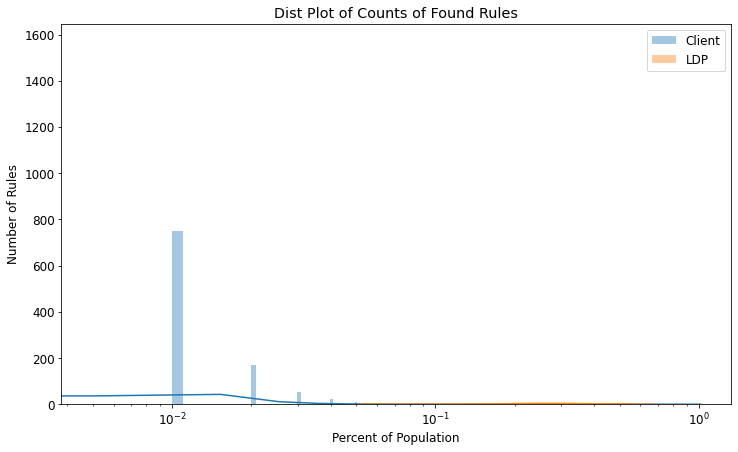

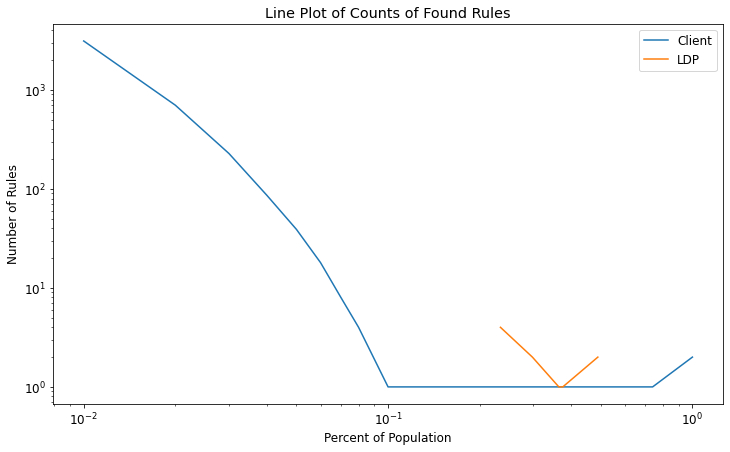

In [14]:
cov.graphRuleCounts(clientDF, ldpDF, graphName)

## Get Table of Structure Counts - Count of rules above threshold

In [10]:
covDF, countDF = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,4211,10,0,1.0


In [11]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"F[0,0]((death > 0.000 & n_evts = 0.000))","F[0,0]((death > 0.000 & n_evts < 0.000))",0.375,0.03
1,"G[0,0]((direct < 0.000 & SBP = 0.000))","G[0,0]((direct < 0.000 & SBP < 0.000))",0.298,0.01
2,"G[0,0]((edrk = 0.000 & SBP = 0.000))","G[0,0]((Mort < 0.000 & SBP < 0.000))",0.234,0.02
3,"G[0,0]((s8_hr > 0.000 & SBP = 0.000))","G[0,0]((death < 0.000 & s8_hr > 0.000))",0.234,0.02
4,"G[0,0]((n_evts < 0.000 | lds > 0.000))","G[0,0]((ICU_Pt_Days > 0.000 | n_evts < 0.000))",0.489,0.02
5,"G[0,0]((direct < 0.000 & SBP < 0.000))","G[0,0]((direct < 0.000 & SBP < 0.000))",0.298,0.01
6,"G[0,0]((n_evts < 0.000 | hr = 0.000))","G[0,0]((hr < 0.000 | n_evts < 0.000))",0.489,0.02
7,"F[0,0]((death > 0.000 & Sgy > 0.000))","F[0,0]((death > 0.000 & Pulse > 0.000))",0.364,0.01
8,"G[0,0]((edrk = 0.000 & SBP < 0.000))","G[0,0]((Mort < 0.000 & SBP < 0.000))",0.234,0.02
9,"G[0,0]((s8_hr > 0.000 & SBP < 0.000))","G[0,0]((death < 0.000 & s8_hr > 0.000))",0.234,0.02


In [12]:
#Look at found rules and compare percent counts
cov.compareFoundRuleCounts(countDF, graphName)

AttributeError: module 'Coverage' has no attribute 'compareFoundRuleCounts'

## Get number of unique structure types

In [13]:
#get number of unique structure types, ignoring vars to get sense of coverage
numUniqueStructs = cov.countUniqueStructuresNoVars(ldpTrees)
print("Total Unique Structures:", numUniqueStructs)

Total Unique Structures: 10
